## Practical intro to eigenvalue problems


Let us assume we have a 2 x 2 stress tensor given:

$$
\sigma = 
\left( \begin{array}{rrr}
-40 & -10  \\                                              
-10 & -60  \\                                             
\end{array}\right) MPa
$$ 

(From Shearer, Introduction to seismology)

We want to find the principle axes, which corresponds to an eigenvalue problem. For any stress tensor, we can find directions ${\bf n}$ such that there are no shear stresses across the plane normal to ${\bf n}$.

Mathematically,

$$
{\bf t}({\bf n}) = \lambda {\bf n}
$$

which means

$$
{\bf \sigma}{\bf n} = \lambda {\bf n}
$$

or 

$$
({\bf \sigma} - \lambda {\bf I}) = 0
$$

This has solutions only if

$$
\text{det}({\bf \sigma} - \lambda {\bf I}) = 0
$$

We solve this using functions that return the eigenvalues and the eigenvectors.

### Exercise

Assume that the horizontal components of the 2D stress tensor are

$
\sigma = \begin{pmatrix}
 -30 & -20  \\
 -20 & -40  \\
\end{pmatrix} MPa
$

Solve the following problems using Python:

* Compute the normal and shear stresses on afault that strikes 10$\deg$ east of north
* Compute the prinzipalstresses (in degrees of east of north) of th maximum and minimum compressional stress axes

#### Expert

* Calculate the stress tensor in the principal coordinate system

$
\sigma^r = {\bf N}^T \sigma {\bf N} 
$
where ${\bf N}$ is the matrix of eigenvectors

* Calculate the mean stress $\sigma_m = 1/2 \operatorname{Trace}({\sigma^r})$
* Calculate the hydrostatic and the deviatoric stress tensors from definition (see slides)


In [25]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la

In [26]:
# initialize 2D tensor [Mpa]
s = np.zeros((2,2))
s[0,0] = -40
s[1,1] = -60
s[0,1] = -10
s[1,0] = -10

print(' Stress tensor ')
print(s)

w,v = la.eig(s)

# Eigenvalues:
print('Eigenvalues')
print(' 1 : ',w[0])
print(' 2 : ',w[1])

# Eigenvectors:
print('Eigenvectors')
print(' 1 : ',v[:,0])
print(' 2 : ',v[:,1])


 Stress tensor 
[[-40. -10.]
 [-10. -60.]]
Eigenvalues
 1 :  -35.85786437626905
 2 :  -64.14213562373095
Eigenvectors
 1 :  [ 0.92387953 -0.38268343]
 2 :  [0.38268343 0.92387953]


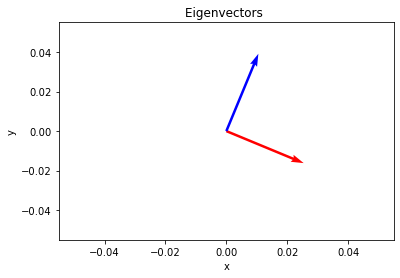

In [27]:
# Plot normalized eigenvectors  
plt.quiver(v[0,0], v[1,0], color=['r'],scale=4)
plt.quiver(v[0,1], v[1,1], color=['b'],scale=4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Eigenvectors ')
plt.show()

In [28]:
# Show that eigenvectors are orthogonal
print(np.dot(v[0,:], v[1,:]))

0.0


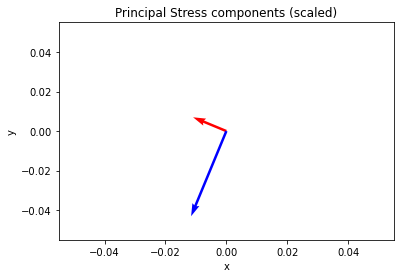

In [29]:
# Plot vectors weighted by eigenvalues

# scale with eigenvalues
v[:,0] = w[0] * v[:,0] 
v[:,1] = w[1] * v[:,1] 

# normalize
v[:,0] = v[:,0]/np.sqrt(v[0,0]**2 + v[1,0])
v[:,1] = v[:,1]/np.sqrt(v[0,1]**2 + v[1,1])

plt.quiver(v[0,0], v[1,0], color=['r'],scale=10)
plt.quiver(v[0,1], v[1,1], color=['b'],scale=10)

plt.title('Principal Stress components (scaled)')

plt.xlabel('x')
plt.ylabel('y')
plt.show()